In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as int
import scipy.stats as st

In [10]:
int.interp1d

scipy.interpolate.interpolate.interp1d

In [56]:
pp= pd.read_csv("/content/StaritaDiarios96_2019prec.csv.csv",index_col=16,parse_dates=True)
sf= pd.read_csv("/content/CaudalAriporoMedDiario1996_2019.csv.csv",index_col=16,parse_dates=True)

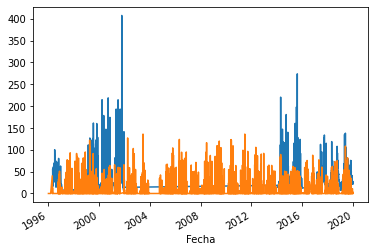

In [24]:
#Sf es surface Flow o caudal, se grafican para ver si puede existir alguna corelacion entre ellos, graficar en excel para ver donde hay o no valores a relacionar
sf['Valor'].plot()
pp['Valor'].plot()

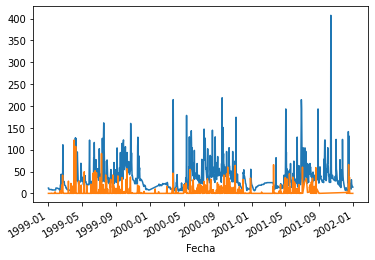

In [22]:
Novnueve_Dosmiluno_sf =sf['Valor'].loc['1999-01-01':'2001-12-31'].plot()
Novnueve_Dosmiluno_pp =pp['Valor'].loc['1999-01-01':'2001-12-31'].plot()

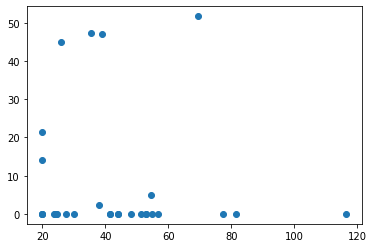

In [31]:
# para saber la relacion se revisa en un diagrama de dispersion a ver si se alinea con una linea recta
plt.scatter(sf['Valor'].loc['1999-06'], pp['Valor'].loc['1999-06'])

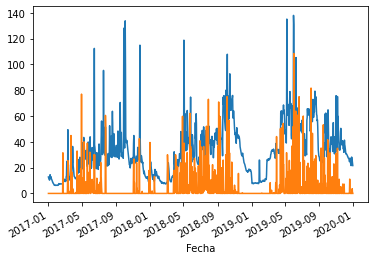

In [23]:
DosMilDiecisiete_DosMilDiecinueve_sf =sf['Valor'].loc['2017-01-01':'2019-12-31'].plot()
DosMilDiecisiete_DosMilDiecinueve_pp =pp['Valor'].loc['2017-01-01':'2019-12-31'].plot()

In [36]:
sf['Valor'].loc['1999-01-01':'2001-12-31'].describe()

count    1065.000000
mean       35.794742
std        32.101623
min         5.300000
25%        17.700000
50%        27.000000
75%        41.800000
max       407.500000
Name: Valor, dtype: float64

In [37]:
pp['Valor'].loc['1999-01-01':'2001-12-31'].describe()

count    973.000000
mean       4.448818
std       11.663628
min        0.000000
25%        0.000000
50%        0.000000
75%        1.600000
max      122.000000
Name: Valor, dtype: float64

In [74]:
# Uniendo en una sola tabla los valores de precipitacion y de caudal o surface flow 
keypp=pd.DataFrame({'Key':pp.index,'Valor':pp['Valor']})


In [75]:
Keysf=pd.DataFrame({'Key':sf.index,'Valor':sf['Valor']})

In [78]:
Unionsf_pp=Keypp.join(Keysf, lsuffix='Valor', rsuffix='Valor')

In [79]:
Unionsf_pp

,KeyValor,ValorValor,KeyValor,ValorValor
Fecha,,,,
1996-01-01,1996-01-01,0.0,NaT,NaN
1996-01-02,1996-01-02,0.0,NaT,NaN
1996-01-03,1996-01-03,0.0,NaT,NaN
1996-01-04,1996-01-04,0.0,NaT,NaN
1996-01-05,1996-01-05,0.0,NaT,NaN
...,...,...,...,...
2019-12-27,2019-12-27,0.0,2019-12-27,28.195891
2019-12-28,2019-12-28,0.0,2019-12-28,26.287937
2019-12-29,2019-12-29,3.7,2019-12-29,25.488759


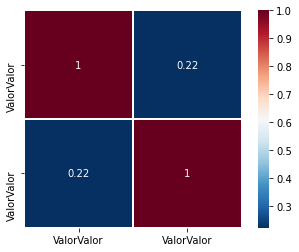

In [80]:
import seaborn as sns
pearsoncorr=Unionsf_pp.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5, square=True)
plt.savefig('PearsoncorrelationEstaciones.png', dpi=300, bbox_inches='tight')

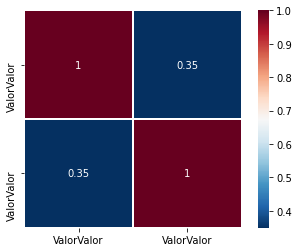

In [81]:
import seaborn as sns
pearsoncorr=Unionsf_pp.corr(method='spearman')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5, square=True)
plt.savefig('PearsoncorrelationEstaciones.png', dpi=300, bbox_inches='tight')

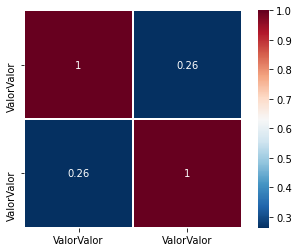

In [83]:
import seaborn as sns
pearsoncorr=Unionsf_pp.corr(method='kendall')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5, square=True)
plt.savefig('PearsoncorrelationEstaciones.png', dpi=300, bbox_inches='tight')